Gọi các thư viện

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

Tải dữ liệu

In [6]:
heart_data = pd.read_csv('../data/cardio_train.csv', delimiter=';')

In [3]:
heart_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1.0,1.0,0.0,0.0,1.0,0.0
1,1,20228,1,156,85.0,140,90,3.0,1.0,0.0,0.0,1.0,1.0
2,2,18857,1,165,64.0,130,70,3.0,1.0,0.0,0.0,0.0,1.0
3,3,17623,2,169,82.0,150,100,1.0,1.0,0.0,0.0,1.0,1.0
4,4,17474,1,156,56.0,100,60,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
heart_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Chuẩn hoá dữ liệu

In [4]:
heart_data['age'] = (heart_data['age'] / 365).round().astype('int64')
heart_data['bmi'] = heart_data['weight'] / ((heart_data['height'] / 100) ** 2)

In [ ]:
heart_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
 13  bmi          70000 non-null  float64
dtypes: float64(2), int64(12)
memory usage: 7.5 MB


In [5]:
heart_data = heart_data.drop(heart_data[heart_data['ap_hi'] <= heart_data['ap_lo']].index)
heart_data = heart_data.drop(heart_data[heart_data['ap_hi'] <= 0].index)
heart_data = heart_data.drop(heart_data[heart_data['ap_lo'] <= 0].index)

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68742 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68742 non-null  int64  
 1   age          68742 non-null  int64  
 2   gender       68742 non-null  int64  
 3   height       68742 non-null  int64  
 4   weight       68742 non-null  float64
 5   ap_hi        68742 non-null  int64  
 6   ap_lo        68742 non-null  int64  
 7   cholesterol  68742 non-null  int64  
 8   gluc         68742 non-null  int64  
 9   smoke        68742 non-null  int64  
 10  alco         68742 non-null  int64  
 11  active       68742 non-null  int64  
 12  cardio       68742 non-null  int64  
 13  bmi          68742 non-null  float64
dtypes: float64(2), int64(12)
memory usage: 7.9 MB


In [6]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Giữ lại các giá trị trong khoảng [lower_bound, upper_bound]
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

columns_to_remove = ['age','ap_hi','ap_lo','bmi']
for column in columns_to_remove:
    heart_data = remove_outliers(heart_data,column)

In [7]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22461 entries, 0 to 25070
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           22461 non-null  int64  
 1   age          22461 non-null  int64  
 2   gender       22461 non-null  int64  
 3   height       22461 non-null  int64  
 4   weight       22461 non-null  float64
 5   ap_hi        22461 non-null  int64  
 6   ap_lo        22461 non-null  int64  
 7   cholesterol  22461 non-null  float64
 8   gluc         22461 non-null  float64
 9   smoke        22461 non-null  float64
 10  alco         22461 non-null  float64
 11  active       22461 non-null  float64
 12  cardio       22461 non-null  float64
 13  bmi          22461 non-null  float64
dtypes: float64(8), int64(6)
memory usage: 2.6 MB


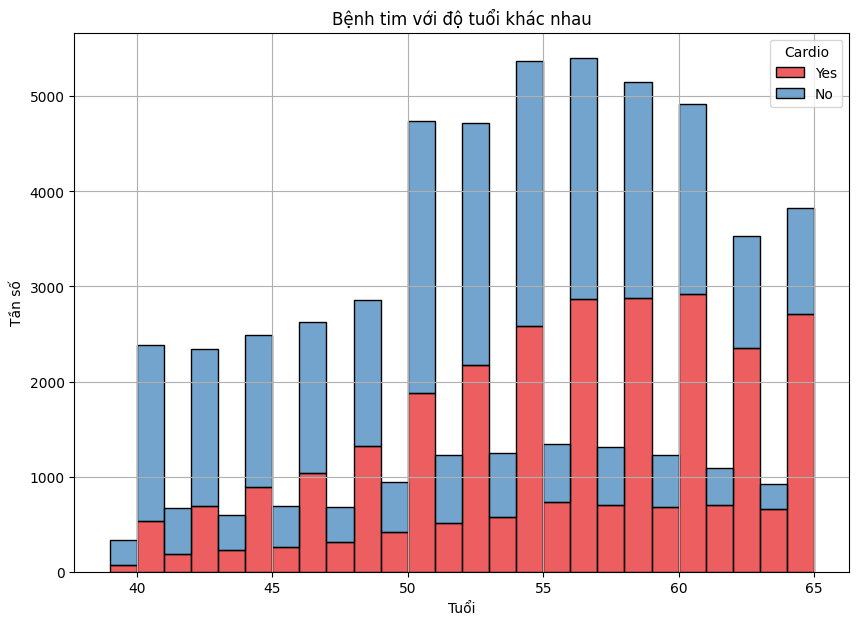

In [ ]:
palette = {0: '#377EB8', 1: '#E41A1C'}

plt.figure(figsize=(10, 7))
sns.histplot(data=heart_data, x='age', hue='cardio', binwidth=1, palette=palette, stat='count', multiple='stack', alpha=0.7)

plt.title('Bệnh tim với độ tuổi khác nhau')
plt.xlabel('Tuổi')
plt.ylabel('Tần số')
plt.legend(title='Cardio', labels=['Yes', 'No'])
plt.grid(True)

plt.show()

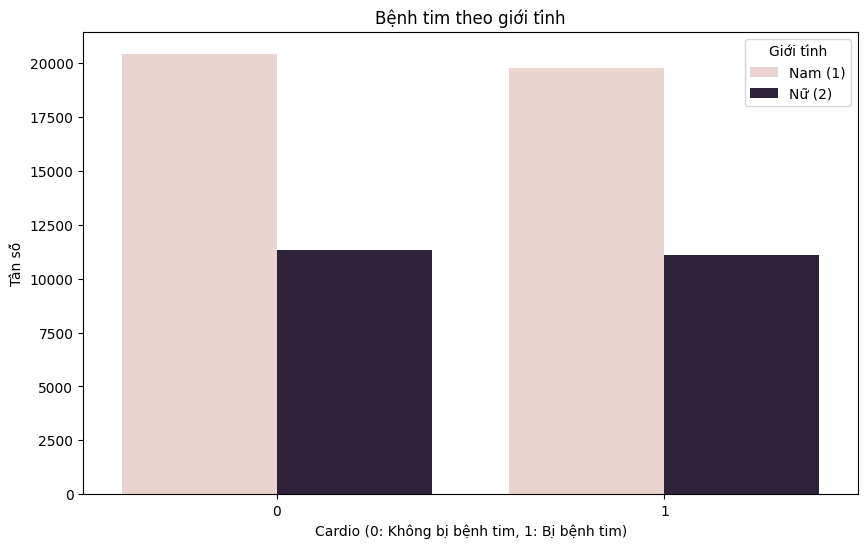

In [ ]:
plt.figure(figsize=(10, 6))

sns.countplot(data=heart_data, x='cardio', hue='gender')
plt.title("Bệnh tim theo giới tính")
plt.xlabel("Cardio (0: Không bị bệnh tim, 1: Bị bệnh tim)")
plt.ylabel("Tần số")

handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Nam (1)', 'Nữ (2)']
plt.legend(handles=handles, labels=new_labels, title='Giới tính')

plt.show()

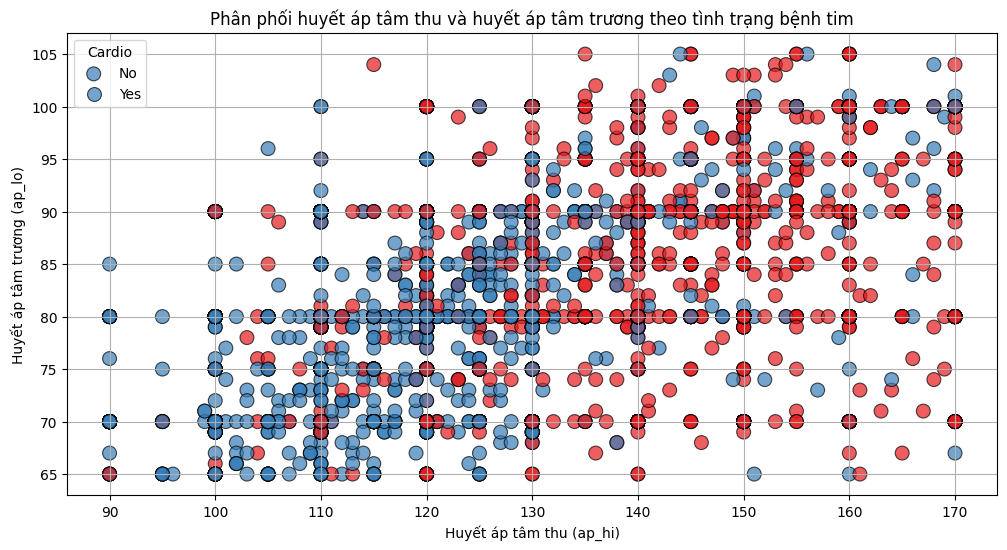

In [ ]:
palette = {0: '#377EB8', 1: '#E41A1C'}

plt.figure(figsize=(12, 6))

sns.scatterplot(data=heart_data, x='ap_hi', y='ap_lo', hue='cardio', palette=palette, s=100, alpha=0.7, edgecolor='k')

plt.title('Phân phối huyết áp tâm thu và huyết áp tâm trương theo tình trạng bệnh tim')
plt.xlabel('Huyết áp tâm thu (ap_hi)')
plt.ylabel('Huyết áp tâm trương (ap_lo)')
plt.legend(title='Cardio', labels=['No', 'Yes'])
plt.grid(True)

plt.show()

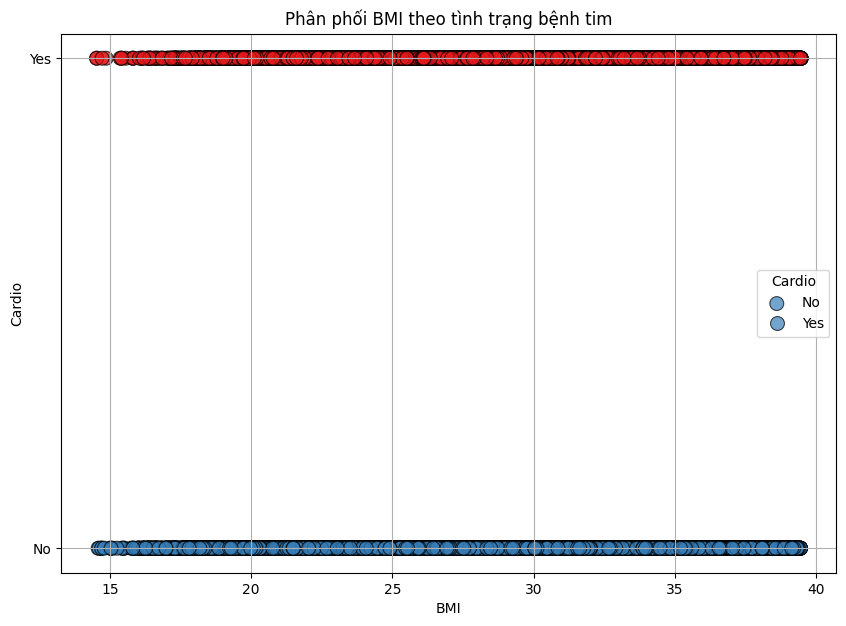

In [ ]:
palette = {0: '#377EB8', 1: '#E41A1C'}

plt.figure(figsize=(10, 7))
sns.scatterplot(data=heart_data, x='bmi', y='cardio', hue='cardio', palette=palette, s=100, alpha=0.7, edgecolor='k')

plt.title('Phân phối BMI theo tình trạng bệnh tim')
plt.xlabel('BMI')
plt.ylabel('Cardio')
plt.yticks([0, 1], labels=['No', 'Yes'])
plt.legend(title='Cardio', labels=['No', 'Yes'])
plt.grid(True)

plt.show()

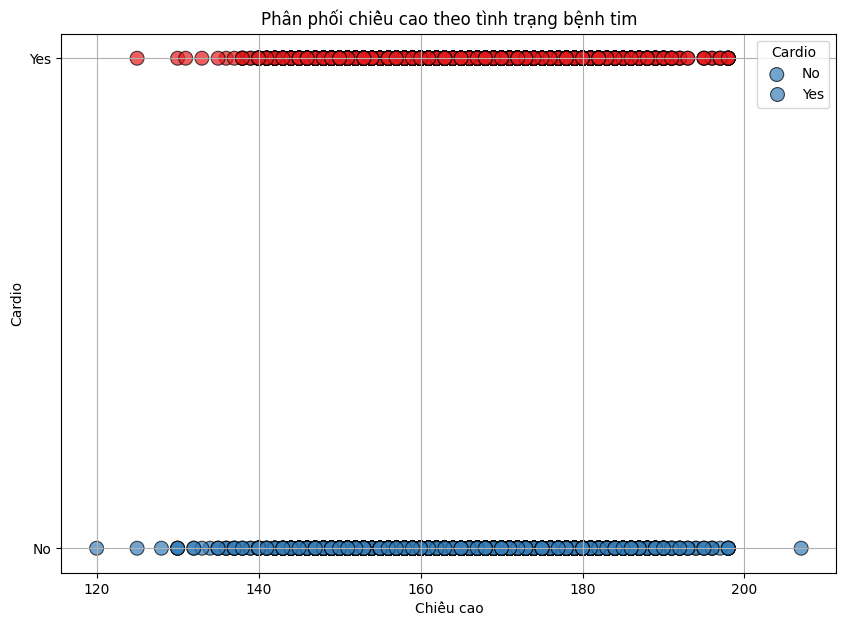

In [ ]:
palette = {0: '#377EB8', 1: '#E41A1C'}

plt.figure(figsize=(10, 7))
sns.scatterplot(data=heart_data, x='height', y='cardio', hue='cardio', palette=palette, s=100, alpha=0.7, edgecolor='k')

plt.title('Phân phối chiều cao theo tình trạng bệnh tim')
plt.xlabel('Chiều cao')
plt.ylabel('Cardio')
plt.yticks([0, 1], labels=['No', 'Yes'])
plt.legend(title='Cardio', labels=['No', 'Yes'])
plt.grid(True)

plt.show()

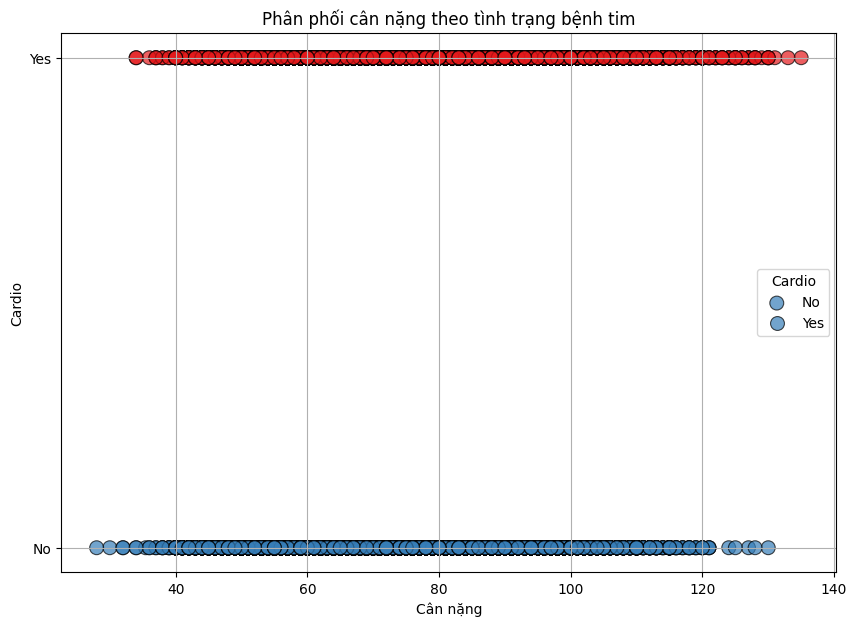

In [ ]:
palette = {0: '#377EB8', 1: '#E41A1C'}

plt.figure(figsize=(10, 7))
sns.scatterplot(data=heart_data, x='weight', y='cardio', hue='cardio', palette=palette, s=100, alpha=0.7, edgecolor='k')

plt.title('Phân phối cân nặng theo tình trạng bệnh tim')
plt.xlabel('Cân nặng')
plt.ylabel('Cardio')
plt.yticks([0, 1], labels=['No', 'Yes'])
plt.legend(title='Cardio', labels=['No', 'Yes'])
plt.grid(True)

plt.show()

<Axes: title={'center': 'Correlation Matrix for Independent Variables'}>

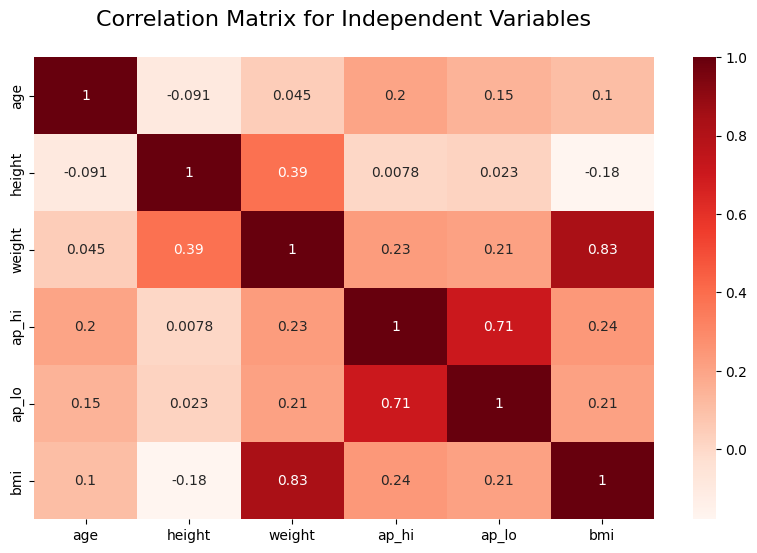

In [ ]:
plt.figure(figsize = (10, 6))
plt.title('Correlation Matrix for Independent Variables', fontsize = 16, y = 1.05)

columns = ['age','height','weight','ap_hi','ap_lo','bmi']
sns.heatmap(heart_data[columns].corr(), annot = True, cmap = 'Reds')

In [8]:
X = heart_data.drop(columns=['cardio','id'])
y = heart_data['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (17968, 12)
X_test shape: (4493, 12)
y_train shape: (17968,)
y_test shape: (4493,)


In [9]:
X_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
16383,56,1,165,63.0,120,80,1.0,1.0,0.0,0.0,0.0,23.140496
19141,60,2,170,80.0,120,80,1.0,1.0,0.0,0.0,1.0,27.681661
18009,55,1,155,78.0,120,80,1.0,1.0,0.0,0.0,0.0,32.466181
9570,44,2,178,92.0,120,80,1.0,1.0,1.0,0.0,1.0,29.036738
3952,52,1,164,80.0,140,90,2.0,1.0,0.0,0.0,1.0,29.744200


In [10]:
y_train.head()

,cardio
16383,0.0
19141,0.0
18009,1.0
9570,0.0
3952,1.0


In [11]:
num_features = ['age', 'bmi', 'ap_hi', 'ap_lo']
cat_features = ['cholesterol','gluc','gender']

num_pipeline = Pipeline([
    ('scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder()),
])

preprocess_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features),
])

In [12]:
X_train = preprocess_pipeline.fit_transform(X_train)
X_test = preprocess_pipeline.fit_transform(X_test)

Thử các model: DecisionTreeClassfier, RandomForestClassfior, SVC, VotingClassfiers, AdaBoost, GradientBoosting, HistGradientBoostingClassifier

In [ ]:
param_grid = {'criterion' : ['gini', "entropy", "log_loss"],
          'splitter'  : ['best'],
          'max_depth' : range(2,11,1),
         'max_features' : range(2,11,1)}

decision_tree_classifier = DecisionTreeClassifier()
grid_search_decision_tree = GridSearchCV(estimator=decision_tree_classifier, param_grid=param_grid, cv=5)
grid_search_decision_tree.fit(X_train, y_train)

grid_search_decision_tree.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 7, 'splitter': 'best'}

Độ chính xác của Decision Tree model: 72.89%

f1 score của Decision Tree model: 72.99%

Độ chính xác của Cross validation của Decision Tree model: 72.26%

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.71      0.75      7019
           1       0.67      0.75      0.71      5509

    accuracy                           0.73     12528
   macro avg       0.73      0.73      0.73     12528
weighted avg       0.73      0.73      0.73     12528



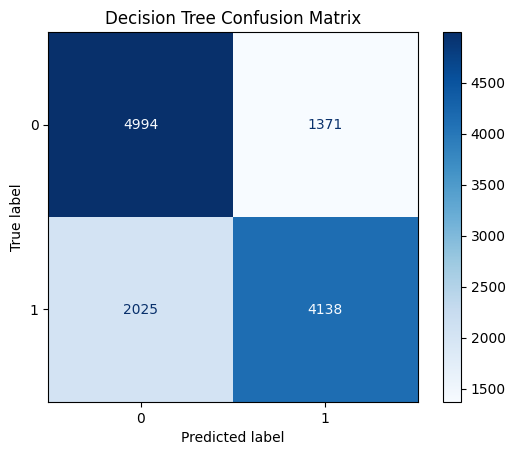

In [ ]:
dt_model = DecisionTreeClassifier(criterion='log_loss', max_depth=6, max_features=7, splitter='best')

dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
f1score = f1_score(y_pred,y_test,average='weighted')

cv = cross_val_score(dt_model,X_train,y_train,cv=5)

report = classification_report(y_pred,y_test, zero_division=1)

print(f"Độ chính xác của Decision Tree model: {round(accuracy*100, 2)}%\n")
print(f"f1 score của Decision Tree model: {round(f1score*100, 2)}%\n")
print(f"Độ chính xác của Cross validation của Decision Tree model: {round(np.mean(cv)*100, 2)}%\n")
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Decision Tree Confusion Matrix")
plt.grid(visible=False)
plt.show()

In [ ]:
param_grid = {
    'n_estimators': [50,100,150,200, 250,300],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}

random_forest_classifier = RandomForestClassifier()
grid_search_random_forest = GridSearchCV(estimator=random_forest_classifier, param_grid=param_grid, cv=5, scoring = 'accuracy', verbose = 3,n_jobs = -1)
grid_search_random_forest.fit(X_train, y_train)

grid_search_random_forest.best_params_

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 300}

Độ chính xác của Random Forest model: 73.18%

f1 score của Random Forest model: 73.32%

Cross validation của Random Forest model: 72.75%

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.71      0.75      7177
           1       0.66      0.76      0.71      5351

    accuracy                           0.73     12528
   macro avg       0.73      0.74      0.73     12528
weighted avg       0.74      0.73      0.73     12528



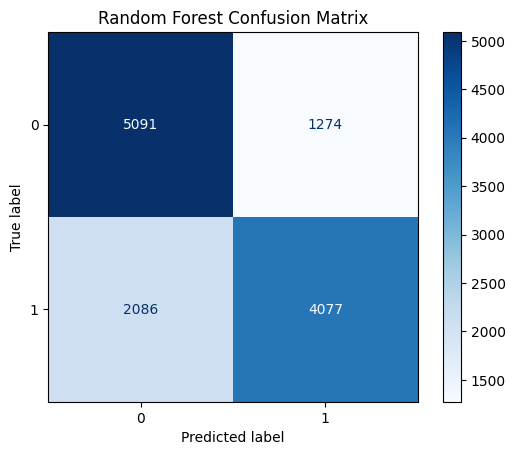

In [ ]:
random_forest_model = RandomForestClassifier(criterion='gini', max_depth=10, n_estimators=300, max_features='sqrt')

random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
f1score = f1_score(y_pred,y_test,average='weighted')

cv = cross_val_score(random_forest_model,X_train,y_train,cv=5)

report = classification_report(y_pred,y_test, zero_division=1)

print(f"Độ chính xác của Random Forest model: {round(accuracy*100, 2)}%\n")
print(f"f1 score của Random Forest model: {round(f1score*100, 2)}%\n")
print(f"Cross validation của Random Forest model: {round(np.mean(cv)*100, 2)}%\n")
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = random_forest_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.grid(visible=False)
plt.show()

In [ ]:
param_grid = {'C': [1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.001, 0.0001],
              'kernel': ['linear', 'rbf']}

grid_search_svc = GridSearchCV(SVC(), param_grid, verbose = 3, cv = 5, refit=False)
grid_search_svc.fit(X_train, y_train)

grid_search_svc.best_params_


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.720 total time=  54.4s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.719 total time=  54.6s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.719 total time=  54.1s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.722 total time=  54.2s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.723 total time=  54.1s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.724 total time= 2.4min
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.721 total time= 2.3min
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.726 total time= 2.4min
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.729 total time= 2.4min
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.723 total time= 2.4min
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.720 total time=  55.6s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear

Độ chính xác của SVC model: 73.24%

f1 score của SVC model: 73.41%

Cross validation của SVC model: 72.62%

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.75      7284
           1       0.65      0.77      0.71      5244

    accuracy                           0.73     12528
   macro avg       0.73      0.74      0.73     12528
weighted avg       0.74      0.73      0.73     12528



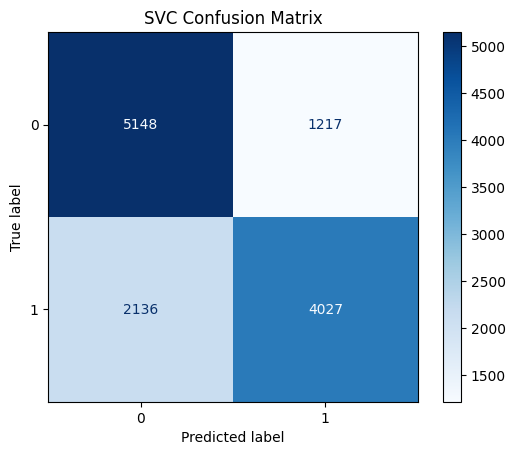

In [ ]:
svc_model = SVC(C = 1, gamma = 0.1, kernel = 'rbf')
svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
f1score = f1_score(y_pred,y_test,average='weighted')

cv = cross_val_score(svc_model,X_train,y_train,cv=5)

report = classification_report(y_pred,y_test, zero_division=1)

print(f"Độ chính xác của SVC model: {round(accuracy*100, 2)}%\n")
print(f"f1 score của SVC model: {round(f1score*100, 2)}%\n")
print(f"Cross validation của SVC model: {round(np.mean(cv)*100, 2)}%\n")
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = svc_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("SVC Confusion Matrix")
plt.grid(visible=False)
plt.show()

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150, 200,250,300],
    'learning_rate': np.arange(0.1,1.0,0.1),
    'algorithm': ['SAMME', 'SAMME.R'],
}

ada_boost_classifier = AdaBoostClassifier()
grid_search_ada_boost = GridSearchCV(estimator=ada_boost_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=3, n_jobs=-1)
grid_search_ada_boost.fit(X_train, y_train)

print("Best Parameters:", grid_search_ada_boost.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.7000000000000001, 'n_estimators': 300}


Độ chính xác của AdaBoost model: 72.96%

f1 score của AdaBoost model: 73.23%

Cross validation của AdaBoost model: 72.18%

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.70      0.76      7513
           1       0.63      0.78      0.70      5015

    accuracy                           0.73     12528
   macro avg       0.73      0.74      0.73     12528
weighted avg       0.75      0.73      0.73     12528



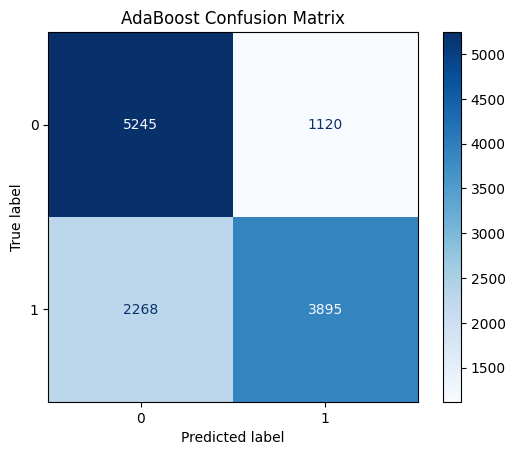

In [ ]:
ada_boost_model = AdaBoostClassifier(n_estimators=300, learning_rate=0.7,algorithm='SAMME.R')
ada_boost_model.fit(X_train, y_train)

y_pred = ada_boost_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_pred, y_test, average='weighted')

cv = cross_val_score(ada_boost_model, X_train, y_train, cv=5)

report = classification_report(y_pred, y_test, zero_division=1)

print(f"Độ chính xác của AdaBoost model: {round(accuracy*100, 2)}%\n")
print(f"f1 score của AdaBoost model: {round(f1score*100, 2)}%\n")
print(f"Cross validation của AdaBoost model: {round(np.mean(cv)*100, 2)}%\n")
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada_boost_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("AdaBoost Confusion Matrix")
plt.grid(visible=False)
plt.show()

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150, 200,250,300],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
    'max_depth': [3, 4, 5,6,7,8,9,10],
}

gradient_boosting_classifier = GradientBoostingClassifier()
grid_search_gradient_boosting = GridSearchCV(estimator=gradient_boosting_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=3, n_jobs=-1)
grid_search_gradient_boosting.fit(X_train, y_train)

print("Best Parameters:", grid_search_gradient_boosting.best_params_)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300}


Độ chính xác của Gradient Boosting model: 73.34%

f1 score của Gradient Boosting model: 73.47%

Cross validation của Gradient Boosting model: 72.96%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.71      0.75      2567
         1.0       0.66      0.76      0.71      1926

    accuracy                           0.73      4493
   macro avg       0.73      0.74      0.73      4493
weighted avg       0.74      0.73      0.73      4493



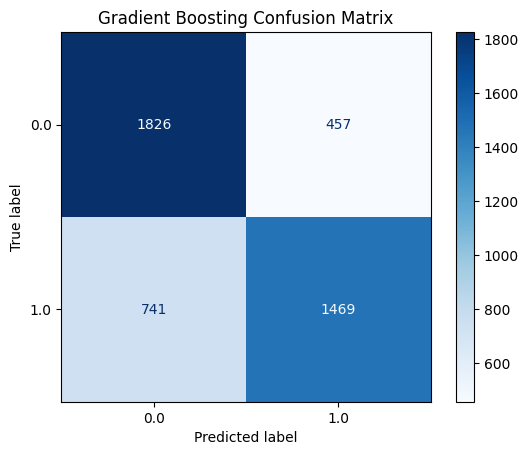

In [13]:
gradient_boosting_model = GradientBoostingClassifier(learning_rate=0.05, max_depth=3, n_estimators=300)
gradient_boosting_model.fit(X_train, y_train)

y_pred = gradient_boosting_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_pred, y_test, average='weighted')

cv = cross_val_score(gradient_boosting_model, X_train, y_train, cv=5)

report = classification_report(y_pred, y_test, zero_division=1)

print(f"Độ chính xác của Gradient Boosting model: {round(accuracy*100, 2)}%\n")
print(f"f1 score của Gradient Boosting model: {round(f1score*100, 2)}%\n")
print(f"Cross validation của Gradient Boosting model: {round(np.mean(cv)*100, 2)}%\n")
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gradient_boosting_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Gradient Boosting Confusion Matrix")
plt.grid(visible=False)
plt.show()


Độ chính xác của Voting Classifier model: 73.18%

f1 score của Voting Classifier model: 73.39%

Cross validation của Voting Classifier model: 72.7%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.70      0.76      2642
         1.0       0.65      0.77      0.70      1851

    accuracy                           0.73      4493
   macro avg       0.73      0.74      0.73      4493
weighted avg       0.75      0.73      0.73      4493



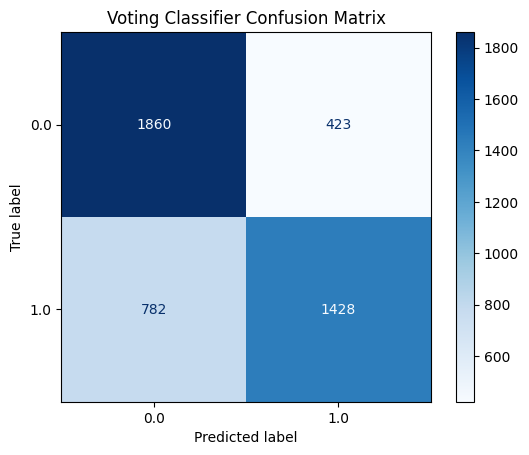

In [14]:
dt_model = DecisionTreeClassifier(criterion='log_loss', max_depth=6, max_features=7, splitter='best')
random_forest_model = RandomForestClassifier(criterion='gini', max_depth=10, n_estimators=300, max_features='sqrt')
svc_model = SVC(C=1, gamma=0.1, kernel='rbf', probability=True)  # Thêm probability=True để SVC có thể dự đoán xác suất
ada_boost_model = AdaBoostClassifier(n_estimators=300, learning_rate=0.7,algorithm='SAMME.R')
gradient_boosting_model = GradientBoostingClassifier(learning_rate=0.05, max_depth=3, n_estimators=300)

voting_classifier = VotingClassifier(estimators=[
    ('dt', dt_model),
    ('rf', random_forest_model),
    ('svc', svc_model),
    ('ada', ada_boost_model),
    ('gb', gradient_boosting_model)
], voting='soft')  # Sử dụng voting='soft' để kết hợp dự đoán dựa trên xác suất

voting_classifier.fit(X_train, y_train)

y_pred = voting_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_pred, y_test, average='weighted')

cv = cross_val_score(voting_classifier, X_train, y_train, cv=5)

report = classification_report(y_pred, y_test, zero_division=1)

print(f"Độ chính xác của Voting Classifier model: {round(accuracy*100, 2)}%\n")
print(f"f1 score của Voting Classifier model: {round(f1score*100, 2)}%\n")
print(f"Cross validation của Voting Classifier model: {round(np.mean(cv)*100, 2)}%\n")
print("Classification Report:\n", report)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voting_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Voting Classifier Confusion Matrix")
plt.grid(visible=False)
plt.show()

Xuất ra model

In [15]:
import pickle

# Lưu mô hình vào file
filename = 'voting_classifier_model.pkl'
pickle_out = open(filename, 'wb')
pickle.dump(voting_classifier, open(filename, 'wb'))
pickle_out.close()